# Trading with Leverage and the Kelly Criterion

## Getting started

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])

In [4]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2010-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GBP_USD  3139 non-null   float64
 1   USD_GBP  3139 non-null   float64
 2   Levered  3139 non-null   float64
 3   Low_Vol  3139 non-null   float64
 4   Random   3139 non-null   float64
 5   Neutral  3139 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 171.7 KB


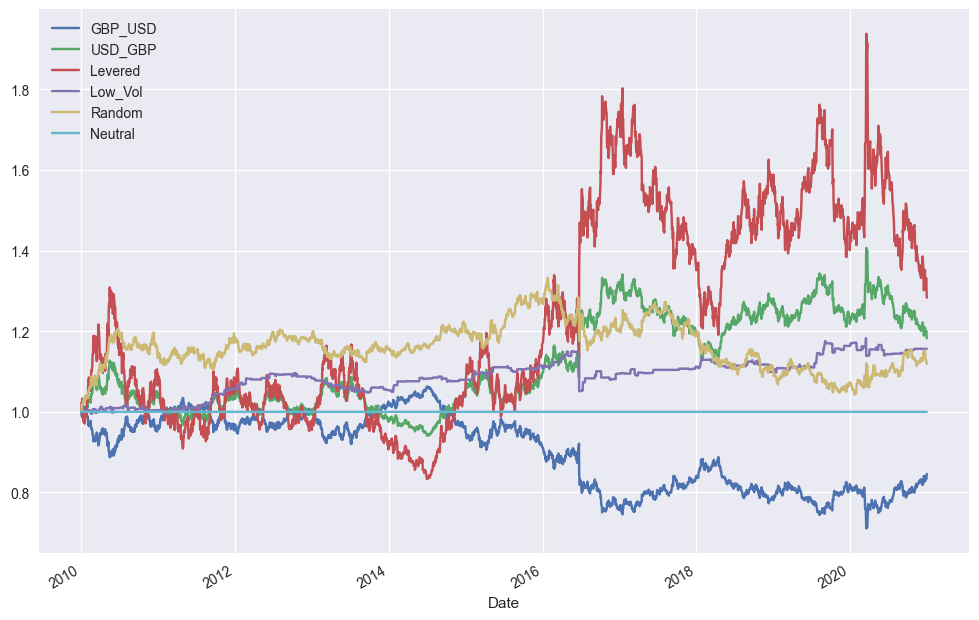

In [5]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [6]:
simple = np.exp(returns) - 1 # simple returns
simple

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002730,0.002737,0.006295,0.0,0.002737,0.0
2010-01-03,-0.001725,0.001728,0.003975,0.0,0.000000,0.0
2010-01-04,-0.005770,0.005803,0.013347,0.0,0.005803,0.0
2010-01-05,0.001688,-0.001686,-0.003877,0.0,0.001688,0.0
2010-01-06,-0.005431,0.005461,0.012560,0.0,0.005461,0.0
...,...,...,...,...,...,...
2020-12-23,0.005017,-0.004992,-0.011481,0.0,-0.004992,0.0
2020-12-27,-0.008243,0.008312,0.019118,0.0,-0.008243,0.0
2020-12-28,0.003807,-0.003792,-0.008722,0.0,-0.003792,0.0


## Recap:  Leverage and Margin Trading

In [7]:
simple

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002730,0.002737,0.006295,0.0,0.002737,0.0
2010-01-03,-0.001725,0.001728,0.003975,0.0,0.000000,0.0
2010-01-04,-0.005770,0.005803,0.013347,0.0,0.005803,0.0
2010-01-05,0.001688,-0.001686,-0.003877,0.0,0.001688,0.0
2010-01-06,-0.005431,0.005461,0.012560,0.0,0.005461,0.0
...,...,...,...,...,...,...
2020-12-23,0.005017,-0.004992,-0.011481,0.0,-0.004992,0.0
2020-12-27,-0.008243,0.008312,0.019118,0.0,-0.008243,0.0
2020-12-28,0.003807,-0.003792,-0.008722,0.0,-0.003792,0.0


In [8]:
symbol = "USD_GBP"

In [9]:
leverage = 2 # equivalent to a margin of 50%

In [10]:
instr = simple[symbol].to_frame().copy()
instr

,USD_GBP
Date,
2010-01-02,0.002737
2010-01-03,0.001728
2010-01-04,0.005803
2010-01-05,-0.001686
2010-01-06,0.005461
...,...
2020-12-23,-0.004992
2020-12-27,0.008312
2020-12-28,-0.003792


In [11]:
instr["Lev_Returns"] = instr[symbol].mul(leverage) # multiply simple returns with leverage
instr

,USD_GBP,Lev_Returns
Date,,
2010-01-02,0.002737,0.005474
2010-01-03,0.001728,0.003457
2010-01-04,0.005803,0.011606
2010-01-05,-0.001686,-0.003371
2010-01-06,0.005461,0.010922
...,...,...
2020-12-23,-0.004992,-0.009984
2020-12-27,0.008312,0.016624
2020-12-28,-0.003792,-0.007584


In [12]:
instr["Lev_Returns"] = np.where(instr["Lev_Returns"] < -1, -1, instr["Lev_Returns"]) # loss limited to 100%
instr

,USD_GBP,Lev_Returns
Date,,
2010-01-02,0.002737,0.005474
2010-01-03,0.001728,0.003457
2010-01-04,0.005803,0.011606
2010-01-05,-0.001686,-0.003371
2010-01-06,0.005461,0.010922
...,...,...
2020-12-23,-0.004992,-0.009984
2020-12-27,0.008312,0.016624
2020-12-28,-0.003792,-0.007584


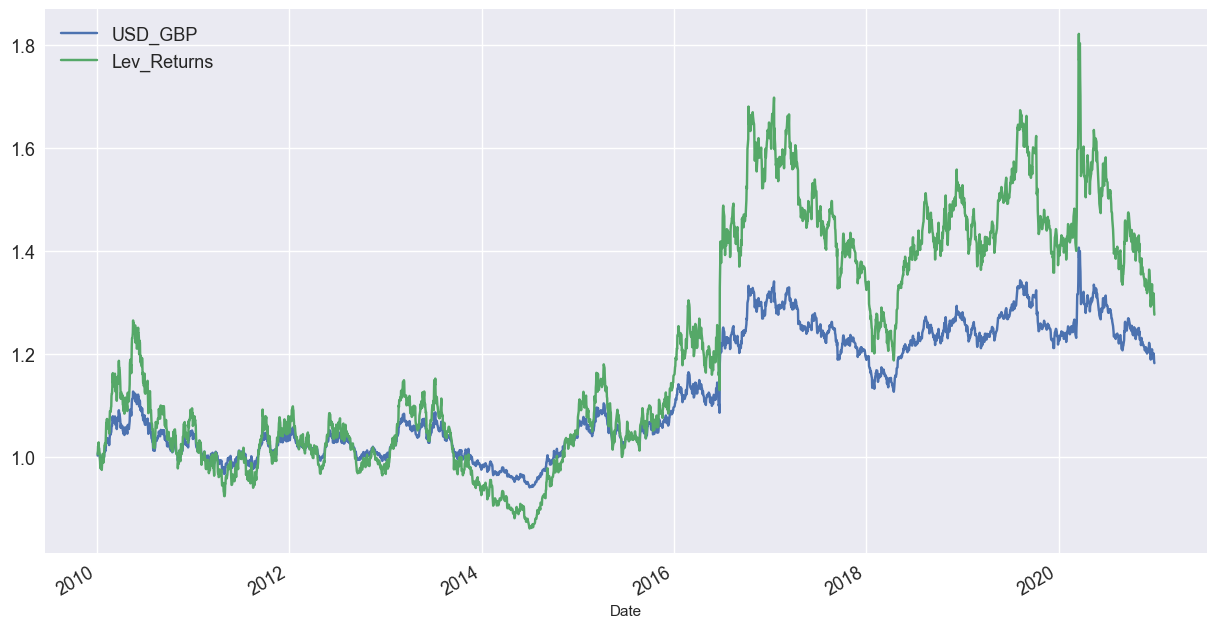

In [13]:
instr.add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Finding the optimal degree of Leverage

In [14]:
simple

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002730,0.002737,0.006295,0.0,0.002737,0.0
2010-01-03,-0.001725,0.001728,0.003975,0.0,0.000000,0.0
2010-01-04,-0.005770,0.005803,0.013347,0.0,0.005803,0.0
2010-01-05,0.001688,-0.001686,-0.003877,0.0,0.001688,0.0
2010-01-06,-0.005431,0.005461,0.012560,0.0,0.005461,0.0
...,...,...,...,...,...,...
2020-12-23,0.005017,-0.004992,-0.011481,0.0,-0.004992,0.0
2020-12-27,-0.008243,0.008312,0.019118,0.0,-0.008243,0.0
2020-12-28,0.003807,-0.003792,-0.008722,0.0,-0.003792,0.0


We can either use __kelly criterion__ or we just __run the backtest for many different leverage settings__.

In [15]:
leverage = np.arange(1, 5, 0.01)
leverage

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.

In [16]:
multiple = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    multiple.append(levered_returns.add(1).prod())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Multiple":multiple})

In [17]:
results.set_index("Leverage", inplace = True)

In [18]:
results

,Multiple
Leverage,
1.00,1.182261
1.01,1.183697
1.02,1.185124
1.03,1.186542
1.04,1.187952
...,...
4.95,0.950938
4.96,0.948744
4.97,0.946546


In [19]:
results.min()

Multiple    0.942142
dtype: float64

In [20]:
max_multiple = results.max()
max_multiple

Multiple    1.283638
dtype: float64

In [21]:
optimal_lev = results.idxmax()
optimal_lev

Multiple    2.35
dtype: float64

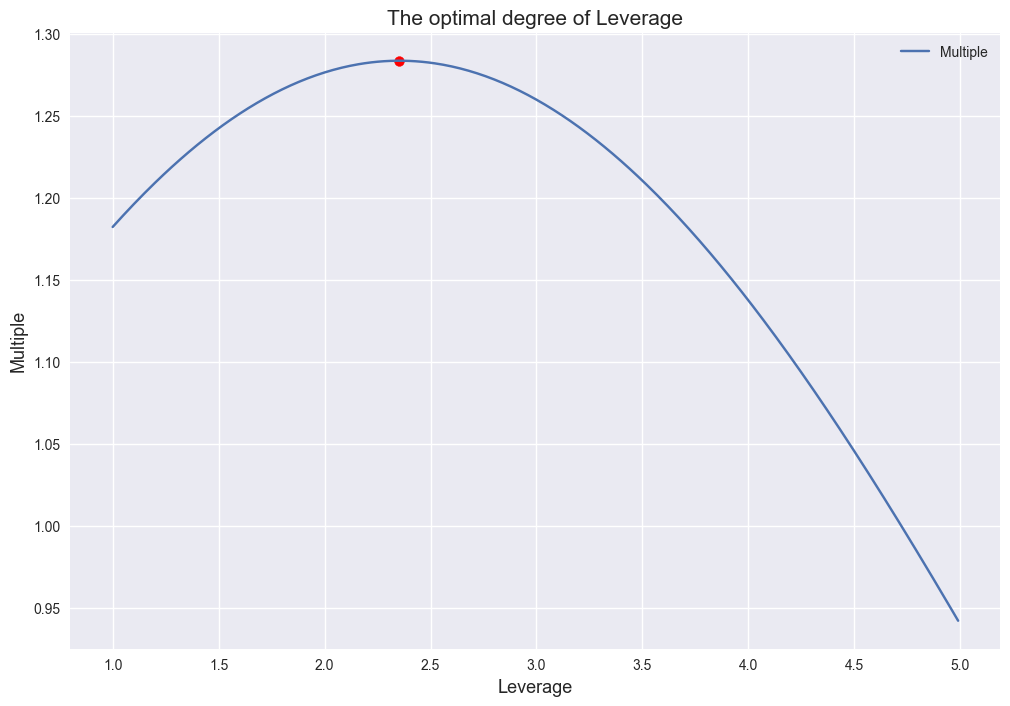

In [22]:
results.plot(figsize = (12, 8));
plt.scatter(x = optimal_lev, y = max_multiple, color = "r", s = 50)
plt.xlabel("Leverage", fontsize = 13)
plt.ylabel("Multiple", fontsize = 13)
plt.title("The optimal degree of Leverage", fontsize = 15)
plt.show()

## The Kelly Criterion

In [23]:
optimal_lev # true/correct value for the optimal leverage

Multiple    2.35
dtype: float64

The Kelly Criterion closely approaches the true/correct value, if
- simple returns are used (Yes)
- dataset is sufficiently large (OK)

In [24]:
instr = simple[symbol].to_frame().copy()
instr

,USD_GBP
Date,
2010-01-02,0.002737
2010-01-03,0.001728
2010-01-04,0.005803
2010-01-05,-0.001686
2010-01-06,0.005461
...,...
2020-12-23,-0.004992
2020-12-27,0.008312
2020-12-28,-0.003792


In [25]:
mu = instr.mean() # mean return (simple)
mu

USD_GBP    0.000068
dtype: float64

In [26]:
var = instr.var() # variance of returns (simple)
var

USD_GBP    0.000029
dtype: float64

In [27]:
kelly = mu / var
kelly

USD_GBP    2.316484
dtype: float64

-> Good approximation by __Kelly criterion__

## The impact of Leverage on Reward & Risk

In [28]:
simple # simple returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002730,0.002737,0.006295,0.0,0.002737,0.0
2010-01-03,-0.001725,0.001728,0.003975,0.0,0.000000,0.0
2010-01-04,-0.005770,0.005803,0.013347,0.0,0.005803,0.0
2010-01-05,0.001688,-0.001686,-0.003877,0.0,0.001688,0.0
2010-01-06,-0.005431,0.005461,0.012560,0.0,0.005461,0.0
...,...,...,...,...,...,...
2020-12-23,0.005017,-0.004992,-0.011481,0.0,-0.004992,0.0
2020-12-27,-0.008243,0.008312,0.019118,0.0,-0.008243,0.0
2020-12-28,0.003807,-0.003792,-0.008722,0.0,-0.003792,0.0


__Reward: 1) Mean of Simple Returns__

In [29]:
leverage = np.arange(1, 5, 0.01)

In [30]:
mu = []
sigma = []
sharpe = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    mu.append(levered_returns.mean()) # mean of simple returns
    sigma.append(levered_returns.std())
    sharpe.append(levered_returns.mean() / levered_returns.std())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Mean": mu, "Std": sigma, "Sharpe": sharpe})

In [31]:
results.set_index("Leverage", inplace = True)

In [32]:
results

,Mean,Std,Sharpe
Leverage,,,
1.00,0.000068,0.005415,0.012544
1.01,0.000069,0.005469,0.012544
1.02,0.000069,0.005523,0.012544
1.03,0.000070,0.005577,0.012544
1.04,0.000071,0.005631,0.012544
...,...,...,...
4.95,0.000336,0.026804,0.012544
4.96,0.000337,0.026858,0.012544
4.97,0.000338,0.026912,0.012544


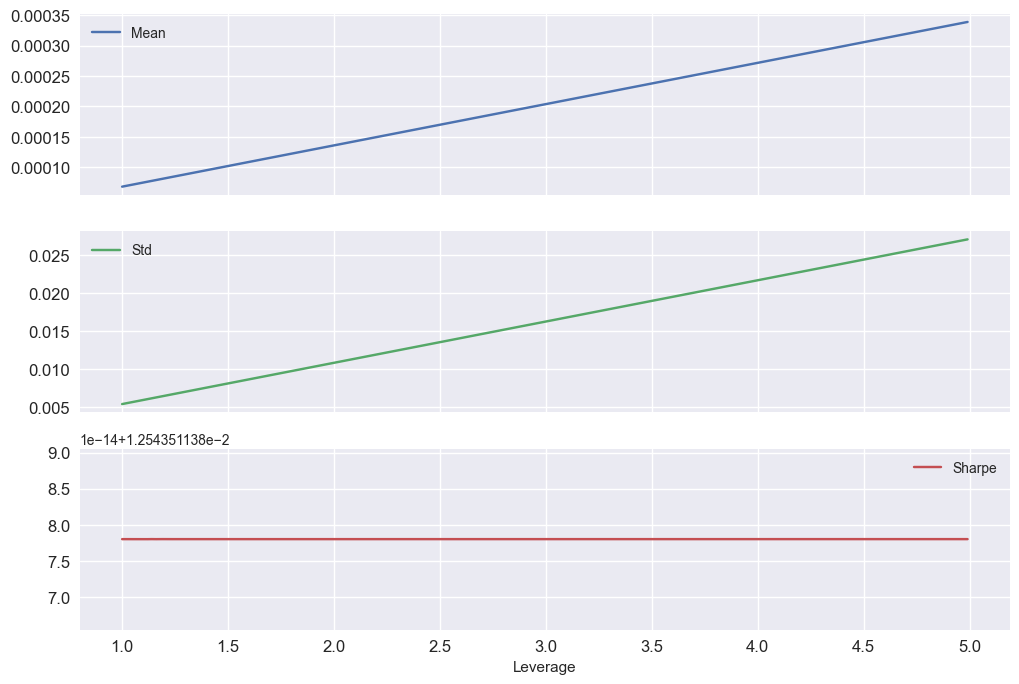

In [33]:
results.plot(subplots = True, figsize = (12, 8), fontsize = 12);
plt.show()

__Mean of simple Returns is steadily increasing with higher leverage -> misleading__

__Sharpe Ratio remains constant -> misleading__

__Reward: 2) Mean of Log Returns__

In [34]:
leverage = np.arange(1, 5, 0.01)

In [35]:
mu = []
sigma = []
sharpe = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    levered_returns = np.log(levered_returns + 1) # convert to log returns
    mu.append(levered_returns.mean()) # mean of log returns
    sigma.append(levered_returns.std())
    sharpe.append(levered_returns.mean() / levered_returns.std())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Mean": mu, "Std": sigma, "Sharpe": sharpe})

In [36]:
results.set_index("Leverage", inplace = True)

In [37]:
results

,Mean,Std,Sharpe
Leverage,,,
1.00,0.000053,0.005395,0.009887
1.01,0.000054,0.005448,0.009861
1.02,0.000054,0.005502,0.009834
1.03,0.000054,0.005556,0.009807
1.04,0.000055,0.005610,0.009781
...,...,...,...
4.95,-0.000016,0.026445,-0.000606
4.96,-0.000017,0.026498,-0.000633
4.97,-0.000018,0.026551,-0.000659


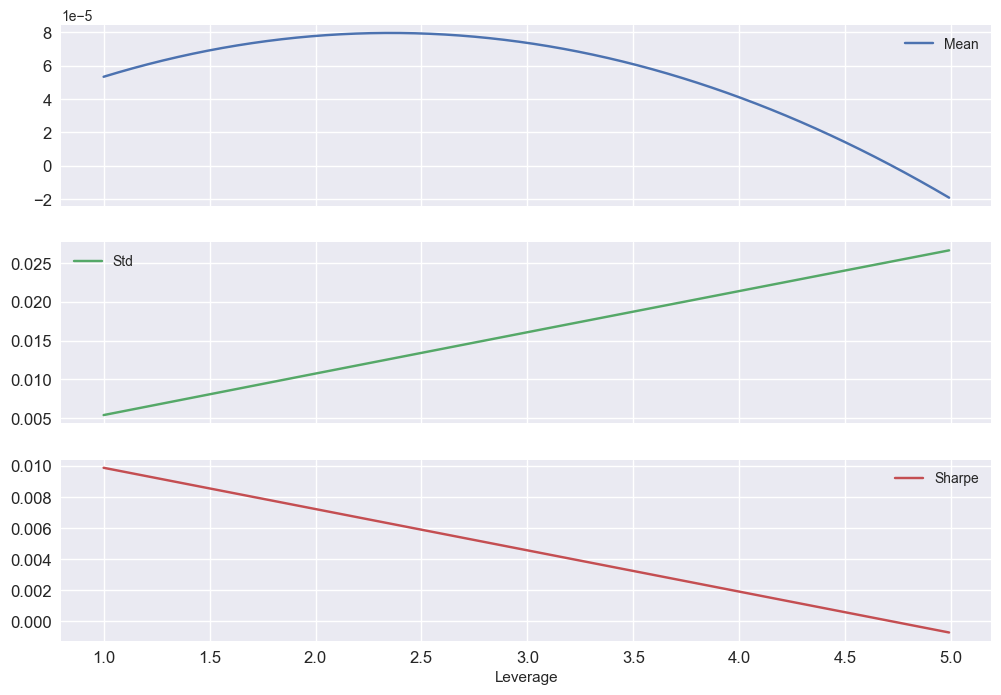

In [38]:
results.plot(subplots = True, figsize = (12, 8), fontsize = 12);
plt.show()

- __Maximum Return @ Kelly__
- __Sharpe Ratio steadily decreasing with higher leverage__.
- __Leverage amplifies losses more than it amplifies gains__.
- __Don´t use leverage if your goal is to maximize risk-adjusted return__
- __If you want to increase return/income with leverage -> Trade-off__
- __Rule of Thumb: Leverage shouldn´t be higher than "Half Kelly".__ 

## Putting everything together

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [40]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [41]:
def kelly_criterion(series): # assuming series with log returns
    
    series = np.exp(series) - 1
    if series.var() == 0:
        return np.nan
    else:
        return series.mean() / series.var()

In [42]:
returns.apply(kelly_criterion).sort_values(ascending = False)

Low_Vol    8.949907
USD_GBP    2.316484
Random     2.195337
Levered    1.007167
GBP_USD   -1.343006
Neutral         NaN
dtype: float64

In [43]:
kelly_criterion(returns.Low_Vol)

8.949907321352814

Side Note: For "Low_Vol", Kelly is not a good approximation because:
- majority of daily returns is zero (neutral)
- only very few "real" observations (non-normal)

In [44]:
returns.Low_Vol.value_counts()

Low_Vol
 0.000000    2826
-0.001950       1
 0.001149       1
 0.011488       1
 0.001376       1
             ... 
 0.002467       1
-0.002912       1
-0.005013       1
 0.003929       1
 0.002567       1
Name: count, Length: 314, dtype: int64

Bonus Question: What´s the correct/true optimal degree of leverage for "Low_Vol"?

------------------------

## Coding Challenge

__Calculate and compare__ the __Kelly Criterion__ for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021.

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.

Determine the Stock with the __highest and lowest Kelly Criterion__.

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Kelly Criterion is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

## +++ Please stop here in case you don´t want to see the solution!!! +++++

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

In [ ]:
returns = np.log(df / df.shift()) # log returns
returns

In [ ]:
def kelly_criterion(series):
    
    series = np.exp(series) - 1
    if series.var() == 0:
        return np.nan
    else:
        return series.mean() / series.var()

In [ ]:
returns.apply(kelly_criterion).sort_values(ascending = False)

-> highest Kelly: AAPL, Lowest Kelly: BA